# Data Wrangling Template

## Gather

In [398]:
# importing
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [399]:
# gathering the first file and testing
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [400]:
# gathering the second file and testing
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

file_name = url.split('/')[-1]

if not os.path.isfile(file_name):  # resource: difference between os.path.exists and os.path.isfile (https://stackoverflow.com/questions/17752078/difference-between-os-path-exists-and-os-path-isfile)
    with open(file_name, 'wb') as file:
        file.write(response.content)
df_images = pd.read_csv(file_name, sep='\t')

In [401]:
# gathering the third piece of data

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if not os.path.exists('tweet-json.txt'):  # hint: this is my added line of code to avoid errors
    with open('tweet-json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
end = timer()
print(end - start)
print(fails_dict)

api_list = []
with open('tweet-json.txt', 'rb') as file:
    for line in file.readlines():
        line_dict = json.loads(line)
        tweet_id = line_dict.get('id')  # the tweet id
        retweet_count = line_dict.get('retweet_count')  # the number of retweets
        favorite_count = line_dict.get('favorite_count')  # the number of favorites
        api = {
                
                'tweet_id': tweet_id,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count
                
              }
        api_list.append(api)
df_api = pd.DataFrame(api_list)
if not os.path.exists('api.csv'):
    df_api.to_csv('api.csv', index=False)


0.0004258999979356304
{}


### Gathering output
1. df_archive
2. df_images
3. df_api

## Assess

### Visual Assessment

In [402]:
df_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [403]:
df_images

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [404]:
df_api

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
...                  ...            ...             ...
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

#### Programmatic assessment

In [405]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [406]:
# getting to understand the archive data
df_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [407]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [408]:
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [409]:
df_archive.shape

(2356, 17)

In [410]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [411]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [412]:
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\omar\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text  rating_numerator
45    This is Bella. She hopes her smile made you sm...                 5
340   RT @dog_rates: This is Logan, the Chow who liv...                75
695   This is Logan, the Chow who lived. He solemnly...                75
763   This is Sophie. She's a Jubilant Bush Pupper. ...                27
1689  I've been told there's a slight possibility he...                 5
1712  Here we have uncovered an entire battalion of ...                26

In [413]:
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].rating_numerator

C:\Users\omar\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


45       5
340     75
695     75
763     27
1689     5
1712    26
Name: rating_numerator, dtype: int64

In [414]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [415]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
River        1
Dunkin       1
Bubba        1
Zooey        1
Rambo        1
Name: name, Length: 957, dtype: int64

In [416]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [417]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [418]:
df_images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [419]:
df_images.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [420]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [421]:
df_api.describe()

tweet_id  retweet_count  favorite_count
count  2.354000e+03    2354.000000     2354.000000
mean   7.426978e+17    3164.797366     8080.968564
std    6.852812e+16    5284.770364    11814.771334
min    6.660209e+17       0.000000        0.000000
25%    6.783975e+17     624.500000     1415.000000
50%    7.194596e+17    1473.500000     3603.500000
75%    7.993058e+17    3652.000000    10122.250000
max    8.924206e+17   79515.000000   132810.000000

#### Quality
- Comleteness
    - in df_archive, some rows are retweets as columns 'retweeted_status_id' and 'retweeted_status_user_id' has values - **solved**
    - in df_archive, some rows archive are replies as columns 'in_reply_to_status_id' and 'in_reply_to_user_id' has values - **solved**
    - some tweets may not have images as shows in the difference in rows number between twitter archive and images prediction(this issue may not be there after getting rid of retweets) - **solved**
    - in df_archive, missing values in expanded_urls - **solved**
- Validity
    - in df_archive, rating_numerator values that have decimal points are not extracted right - **solved**
    - in df_archive, min value in 'rating_denominator' can not be 0 - **solved**
- Accuracy
    - in df_archive, invalid names like 'a' or 'an'. probably happens because name value was extracted after the "this is .." in the tweet. A common pattern found for such names is they all start with small letters. - **solved**
- Consistency
    - in df_archive, rating_numerator values need to be float to be consistent with the data extracted - **solved**
    - in df_archive, in columns(name,...,puppo), missing data are represented as 'None' not 'NaN' - **solved**
    - in df_archive, timestamp is not datetime - **solved**
    - in df_images, 543 false values for p1_dog which means. 543 of the values propably are not dogs

#### tidiness
- 'doggo', 'floofer', 'pupper', 'puppo' are just 1 variable 'stage' - **solved**
- twitter archive table and api table are the same obesrvational unit - **solved**

## Clean

#### Copy dataframes

In [422]:
df_archive_copy = df_archive.copy()
df_api_copy = df_api.copy()
df_images_copy = df_images.copy()

#### Define
###### twitter archive table and api table are the same observational  unit
- merge df_archive_copy and df_api_copy on 'tweet_id' and save the result in df_archive_copy

#### Code

In [423]:
df_archive_copy = pd.merge(df_archive_copy, df_api_copy, on='tweet_id')

#### Test

In [424]:
df_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  retweet_count  \
0                  10   Phineas  None    None   None  None           8853   
1                  10     Tilly  None    None   None  None           6514   
2                  10    Archie  None    None   None  None           4328   
3                  10     Darla  None    None   None  None           8964   
4                  10  Franklin  None    None   None  None           9774   

   favorite_count  
0           39467  
1           33819  
2           25461  
3           42908  
4           41048

In [425]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  doggo                       2354 

#### Define
###### in df_archive, some rows are retweets as columns 'retweeted_status_id' and 'retweeted_status_user_id' has values
- drop the non nan rows in retweeted_status_id and retweeted_status_user_id using pandas.Series.isna function

#### Code

In [426]:
df_archive_copy = df_archive_copy[df_archive_copy.retweeted_status_id.isna()]
df_archive_copy = df_archive_copy[df_archive_copy.retweeted_status_user_id.isna()]

#### Test

In [427]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define
###### in df_archive, some rows are replies as columns 'in_reply_to_status_id' and 'in_reply_to_user_id' has values
- drop the non nan rows in in_reply_to_status_id' and in_reply_to_user_id using pandas.Series.isna function

##### Code

In [428]:
df_archive_copy = df_archive_copy[df_archive_copy.in_reply_to_status_id.isna()]
df_archive_copy = df_archive_copy[df_archive_copy.in_reply_to_user_id.isna()]

#### Test

In [429]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [430]:
# drop unwanted columns
df_archive_copy.drop(labels=['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
 12  retweet_count       2097 non-null   int64 
 13  favorite_count      2097 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 245.7+ KB


#### Define
##### some tweets may not have images as shows in the difference in rows number between twitter archive and images prediction(this issue may not be there after getting rid of retweets)
- re-assessing: After solving for completeness in df_archive_copy, number of rows in df_archive_copy is 2097 while number of rows in df_images_copy is 2075
- drop rows in df_archive_copy that don't have a match in tweet_id column in df_images_copy 

#### Code

In [431]:
df_archive_copy = df_archive_copy[df_archive_copy.tweet_id.isin(df_images_copy.tweet_id)]

#### Test

In [432]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
 12  retweet_count       1971 non-null   int64 
 13  favorite_count      1971 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 231.0+ KB


### Re-Assessing
#### Define
##### after removing rows that doesn't have a match in tweet_id from df_archive_copy, number of rows becomes 1971(less than number of rows in df_images_copy)
- do the same trick with df_images_copy

#### Code

In [433]:
df_images_copy = df_images_copy[df_images_copy.tweet_id.isin(df_archive_copy.tweet_id)]

#### Test

In [434]:
df_images_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   int64  
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


#### Define
##### in df_archive, missing values in expanded_urls
- solved while solving other completeness issues between dataframes

#### Code

#### Test

#### Define
##### 'doggo', 'floofer', 'pupper', 'puppo' are just 1 variable 'stage'
- replace the None values with empty values to be neglected while using pd.series.add() function
- create a new series 'stage' which has all the values in doggo, floofer, pupper and puppo
- fix typo issues using the replace function
- drop unwanted series

#### Code

In [435]:
df_archive_copy.doggo.replace('None', '', inplace=True)
df_archive_copy.floofer.replace('None', '', inplace=True)
df_archive_copy.pupper.replace('None', '', inplace=True)
df_archive_copy.puppo.replace('None', '', inplace=True)

In [436]:
df_archive_copy['stage'] = df_archive_copy.doggo.add(df_archive_copy.floofer).add(df_archive_copy.pupper).add(df_archive_copy.puppo)

df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
 12  retweet_count       1971 non-null   int64 
 13  favorite_count      1971 non-null   int64 
 14  stage               1971 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.4+ KB


In [437]:
df_archive_copy.stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: stage, dtype: int64

In [438]:
df_archive_copy.stage.replace(to_replace='doggopupper', value='doggo-pupper', inplace=True)
df_archive_copy.stage.replace(to_replace='doggofloofer', value='doggo-floofer', inplace=True)
df_archive_copy.stage.replace(to_replace='doggopuppo', value='doggo-puppo', inplace=True)

In [439]:
df_archive_copy.stage.value_counts()

                 1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: stage, dtype: int64

In [440]:
df_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [441]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   retweet_count       1971 non-null   int64 
 9   favorite_count      1971 non-null   int64 
 10  stage               1971 non-null   object
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


In [442]:
df_archive_copy.replace('', np.nan, inplace=True)

In [443]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   retweet_count       1971 non-null   int64 
 9   favorite_count      1971 non-null   int64 
 10  stage               303 non-null    object
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


In [444]:
df_archive_copy.stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: stage, dtype: int64

#### Define
###### in df_archive, in columns(name,...,puppo), missing data are represented as 'None' not 'NaN'
- replace None with NaN using df.series.replace function in name as other columns are fixed

#### Code

In [445]:
df_archive_copy.name.replace('None', np.nan, inplace=True)


#### Test

In [446]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1447 non-null   object
 8   retweet_count       1971 non-null   int64 
 9   favorite_count      1971 non-null   int64 
 10  stage               303 non-null    object
dtypes: int64(5), object(6)
memory usage: 184.8+ KB


#### Define
##### in df_archive, min value in 'rating_denominator' can not be 0
- replace the rating_denominator of 0 to be 10 

#### Code

In [447]:
df_archive_copy.rating_denominator.replace(0, 10, inplace=True)

#### Test

In [448]:
df_archive_copy.rating_denominator.value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

#### Define
##### in df_archive, timestamp is not datetime
- change the timestamp to datetime using pandas.to_datetime function

#### Code

In [449]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

#### Test

In [450]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  stage               303 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 184.8+ KB


In [451]:
df_archive_copy.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  retweet_count  favorite_count stage  
0                  10   Phineas           8853           39467   NaN  
1                  10     Tilly           6514           33819   NaN  
2                  10    Archie           4328           25461   NaN  
3                  10     Darla           8964           42908   NaN  
4                  10  Franklin           9774           41048   NaN

#### Define
##### in df_archive, rating_numerator values need to be float to be consistent with the data extracted
- change the datatype of the column from int to float

#### Code

In [452]:
df_archive_copy.rating_numerator = df_archive_copy.rating_numerator.astype(float)

#### Test

In [453]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1447 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  stage               303 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 184.8+ KB


#### Define
##### in df_archive, rating_numerator values that have decimal points are not extracted right
- extract the values from the text column in df_archive that have decimal numerator and then update the numerator column with these values

#### Code

In [454]:
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")].text.str.extract(r"(\d+\.\d*)")

C:\Users\omar\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


0
44     13.5
694    9.75
762   11.27
1710  11.26

In [455]:
df_archive_copy.rating_numerator.update(pd.Series([13.5, 9.75, 11.27, 11.26], index=[44, 694, 762, 1710]))

#### Test

In [457]:
df_archive_copy[df_archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")].rating_numerator

C:\Users\omar\anaconda3\envs\data_analysis\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


44      13.50
694      9.75
762     11.27
1710    11.26
Name: rating_numerator, dtype: float64

#### Define
##### in df_archive, invalid names like 'a' or 'an'. probably happens because name value was extracted after the "this is .." in the tweet. A common pattern found for such names is they all start with small letters.
- check in the names series if the first letter is lower case then replace the value with NaN

#### Code

In [458]:
df_archive_copy.name.mask(df_archive_copy.name.str.match('^[a-z]', na=False), inplace=True)

#### Test

In [459]:
df_archive_copy.name.value_counts()

Charlie     11
Oliver      10
Cooper      10
Lucy        10
Tucker       9
            ..
Edgar        1
Skittles     1
Stuart       1
JD           1
Shelby       1
Name: name, Length: 912, dtype: int64

In [460]:
df_archive_copy.name.isna().sum()

622

In [461]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   float64            
 6   rating_denominator  1971 non-null   int64              
 7   name                1349 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  stage               303 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 184.8+ KB


#### Define
##### in df_images, 543 false values for p1_dog which means. 543 of the values propably are not dogs
- drop false results in p1_dog then p2_dog(to add more assesrtion) in df_images_copy and merge df_images_copy with df_archive_copy to create df_master to be used in visualization

#### Code

In [462]:
df_images_copy = df_images_copy[df_images_copy.p1_dog==True]
df_images_copy = df_images_copy[df_images_copy.p2_dog==True]
df_master = pd.merge(df_archive_copy, df_images_copy, on='tweet_id')

#### Test

In [463]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1336
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1337 non-null   int64              
 1   timestamp           1337 non-null   datetime64[ns, UTC]
 2   source              1337 non-null   object             
 3   text                1337 non-null   object             
 4   expanded_urls       1337 non-null   object             
 5   rating_numerator    1337 non-null   float64            
 6   rating_denominator  1337 non-null   int64              
 7   name                957 non-null    object             
 8   retweet_count       1337 non-null   int64              
 9   favorite_count      1337 non-null   int64              
 10  stage               208 non-null    object             
 11  jpg_url             1337 non-null   object             
 12  img_num             1337 non-null 

In [464]:
df_images_copy.p1_dog.value_counts()

True    1337
Name: p1_dog, dtype: int64

In [465]:
df_images_copy.p2_dog.value_counts()

True    1337
Name: p2_dog, dtype: int64

#### insights
- what is the average retweet count per dog stage
- what is the average favorite count per dog stage

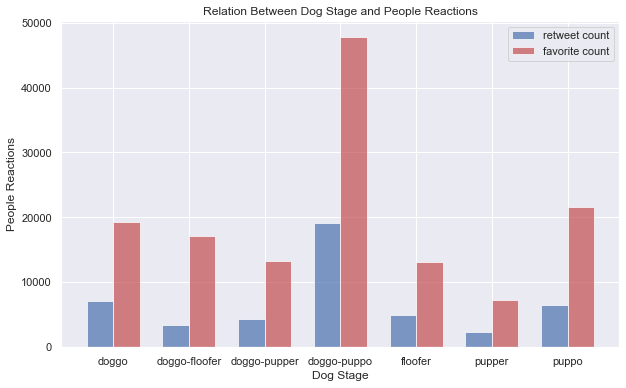

In [466]:
# plot bars
avg_retweet_count_dog_stage = df_archive_copy.groupby('stage').retweet_count.mean()
avg_favourite_count_dog_stage = df_archive_copy.groupby('stage').favorite_count.mean()
ind = np.arange(len(avg_retweet_count_dog_stage))  # the x locations for the groups
width = 0.35       # the width of the bars

red_bars = plt.bar(ind, avg_retweet_count_dog_stage, width, color='b', alpha=.7, label='retweet count')
white_bars = plt.bar(ind + width, avg_favourite_count_dog_stage, width, color='r', alpha=.7, label='favorite count')

# title and labels
plt.ylabel('People Reactions')
plt.xlabel('Dog Stage')
plt.title('Relation Between Dog Stage and People Reactions')
locations = ind + width / 2  
labels = df_archive_copy.groupby('stage').groups.keys()
plt.xticks(locations, labels)

# legend
plt.legend()
plt.savefig('stage.png')

#### Conclusion
- From the definition of doggo and puppo, and by looking to this chart we can see that people tend to favorite and retweet more for images of older dogs

#### Insights
- what is the average rating of dogs per type?

In [467]:
df_master['rating'] = df_master.rating_numerator/df_master.rating_denominator
avg_rating_dog_type = df_master.groupby('p1').rating.mean().sort_values(ascending=False)[9::-1]
avg_rating_dog_type.plot(kind='barh', alpha=.7, title='Top Rated Dogs')
plt.savefig('ratingpertype.png')

In [468]:
# get the average error in detection
avg_conf = df_master.p1_conf.mean() * 100
avg_std = df_master.p1_conf.std() * 100
print("level of confidence is {:.2f}-{:.2f}%".format(avg_conf-avg_std, avg_conf+avg_std))

level of confidence is 37.07-88.18%


- what is the average retweet count of dogs per type?

In [469]:
avg_retweet_count_dog_type = df_master.groupby('p1').retweet_count.mean().sort_values(ascending=False)[9::-1]
avg_retweet_count_dog_type.plot(kind='barh', alpha=.7, title='Most Retweeted Dogs')
plt.savefig('retweetspertype.png')

- what is the average favorite count of dogs per type?

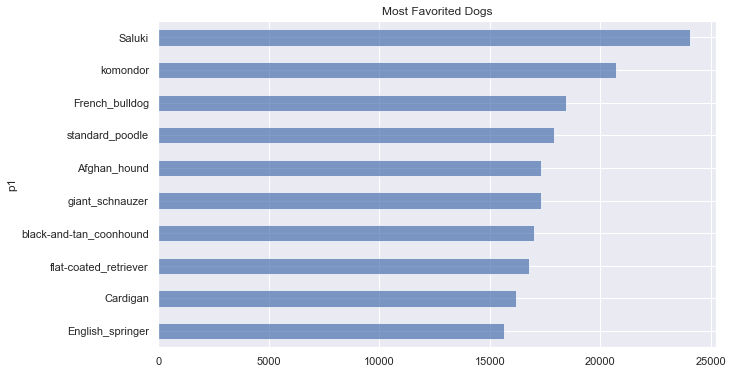

In [473]:
avg_favorite_count_dog_type = df_master.groupby('p1').favorite_count.mean().sort_values(ascending=False)[9::-1]
avg_favorite_count_dog_type.plot(kind='barh', alpha=.7, title='Most Favorited Dogs')
plt.savefig('favoritepertype.png')

- what is the relationship between rating and retweet count?
- what is the relationship between rating and favorite count?

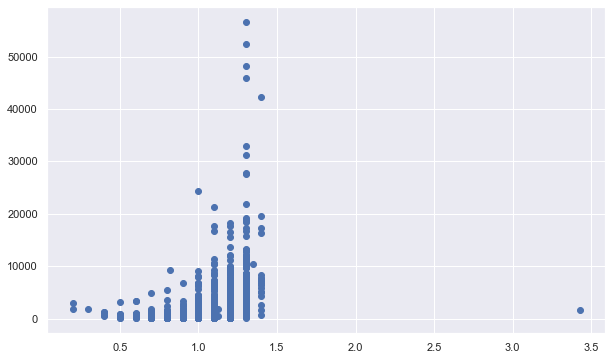

In [474]:
plt.scatter(df_master.rating, df_master.retweet_count)
plt.savefig('rating_retweet_relation.png')

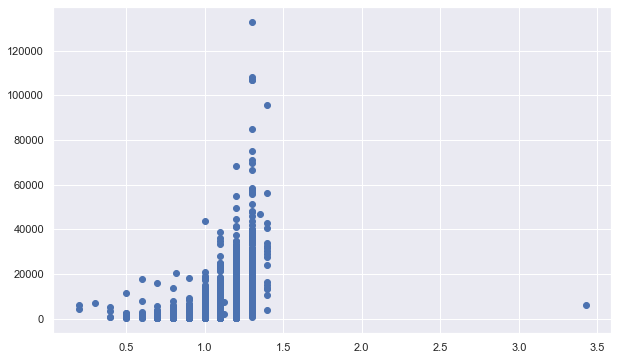

In [475]:
plt.scatter(df_master.rating, df_master.favorite_count)
plt.savefig('rating_favorite_relation.png')